# TASK 4

# Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

# STEP 1. Importing Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import re

# STEP 2. Loading the Dataset

In [77]:
file_path = "tweet_training_1 - twitter_training.csv"  # Update with your dataset's path
df = pd.read_csv(file_path)
df

,2401,Borderlands,Positive,text,Column 1,Column 2
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,NaN,NaN
...,...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,NaN,NaN
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,NaN,NaN
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,NaN,NaN
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,NaN,NaN


# STEP 3 : Text Cleaning Function

In [89]:
import re

def clean_text(text):
    if isinstance(text, str):  # Check if the text is a string
        text = re.sub(r"http\S+", "", text)  # Remove URLs
        text = re.sub(r"@\w+", "", text)    # Remove mentions
        text = re.sub(r"#", "", text)       # Remove hashtags
        text = re.sub(r"\s+", " ", text)     # Remove extra spaces
        text = text.strip()                  # Remove leading/trailing spaces
        return text
    else:
        return ""  # Return an empty string if the text is not a valid string

# STEP : 4 Applying the Clean Text Function

In [91]:
# Now apply the clean_text function
df['clean_text'] = df['text'].apply(clean_text)


In [93]:
df

,2401,Borderlands,Positive,text,Column 1,Column 2,clean_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,NaN,NaN,im getting into borderlands and i can murder y...
...,...,...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,NaN,NaN,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,NaN,NaN,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,NaN,NaN,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,NaN,NaN,Just realized between the windows partition of...


# STEP 5 : Sentiment Analysis with VADER

In [98]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the necessary lexicon for VADER
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment
def get_sentiment_vader(text):
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score['compound']  # You can also return other sentiment scores like 'pos', 'neu', 'neg'

# Apply sentiment analysis to the 'clean_text' column
df['sentiment_score'] = df['clean_text'].apply(get_sentiment_vader)

# View the sentiment scores
print(df[['clean_text', 'sentiment_score']].head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\utsav\AppData\Roaming\nltk_data...


                                          clean_text  sentiment_score
0  I am coming to the borders and I will kill you...          -0.6908
1  im getting on borderlands and i will kill you ...          -0.6908
2  im coming on borderlands and i will murder you...          -0.6908
3  im getting on borderlands 2 and i will murder ...          -0.6908
4  im getting into borderlands and i can murder y...          -0.6908


# STEP 6 : Applying Sentiment Analysis

In [104]:
df['Sentiment'] = df['clean_text'].apply(get_sentiment_vader)


,2401,Borderlands,Positive,text,Column 1,Column 2,clean_text,sentiment_score,Sentiment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,I am coming to the borders and I will kill you...,-0.6908,-0.6908
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,im getting on borderlands and i will kill you ...,-0.6908,-0.6908
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN,im coming on borderlands and i will murder you...,-0.6908,-0.6908
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN,im getting on borderlands 2 and i will murder ...,-0.6908,-0.6908
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,NaN,NaN,im getting into borderlands and i can murder y...,-0.6908,-0.6908
...,...,...,...,...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,NaN,NaN,Just realized that the Windows partition of my...,0.0772,0.0772
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,NaN,NaN,Just realized that my Mac window partition is ...,-0.2960,-0.2960
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,NaN,NaN,Just realized the windows partition of my Mac ...,-0.2960,-0.2960
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,NaN,NaN,Just realized between the windows partition of...,0.0772,0.0772


# STEP 7 : Visualizing Sentiment Distribution

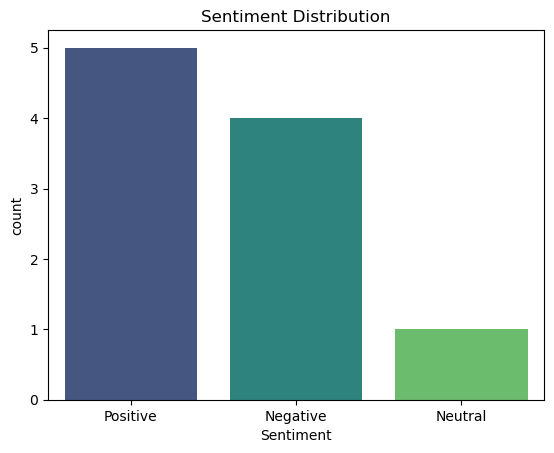

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data for demonstration
data = {
    'sentiment_score': [0.1, -0.2, 0.3, 0.0, 0.05, -0.07, 0.15, -0.1, 0.2, -0.3]
}
df = pd.DataFrame(data)

# Function to classify sentiment
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Create a new column 'Sentiment' based on the sentiment score
df['Sentiment'] = df['sentiment_score'].apply(classify_sentiment)

# Plot sentiment distribution
# Using hue to avoid the FutureWarning
sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette='viridis', legend=False)
plt.title("Sentiment Distribution")
plt.show()